In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("../../Graph_Data_Storage/homo.csv")
src=df.loc[:,"source"].to_numpy()
dst=df.loc[:,"target"].to_numpy()

In [3]:
df_info = pd.read_csv("../../Graph_Data_Storage/homo_info.csv")
no_nodes = df_info.loc[:,"No. Nodes"].to_numpy()
no_nodes = no_nodes[0]
print(no_nodes)
adj_mat = np.zeros(shape=(no_nodes,no_nodes))
k=50

2000


In [4]:
for s,d in zip(src,dst):
    adj_mat[s][d]=1
    
adj_T = adj_mat.T

In [5]:
g = nx.from_numpy_array(adj_mat, create_using=nx.DiGraph())
print(g.number_of_edges())
print(g.number_of_nodes())


96501
2000


In [6]:
init_guess = np.random.rand(np.shape(adj_mat)[0], 1)
init_guess = init_guess / np.sum(init_guess)

## Perform pagerank 

pr = nx.pagerank(g)
values = np.array(list(pr.values()))
print(values)

seed_size = k

init_guess_seeds = np.argsort(-values)[:seed_size] 
print(init_guess_seeds)
init_guess_pr = np.zeros(shape=(no_nodes))
for idx in init_guess_seeds:
    init_guess_pr[idx]=1



[0.00014274 0.00014274 0.00014274 ... 0.00582632 0.0092626  0.00247187]
[1987 1998 1972 1993 1976 1984 1957 1961 1992 1970 1997 1954 1982 1930
 1974 1960 1955 1962 1932 1923 1989 1940 1959 1942 1967 1894 1983 1922
 1928 1912 1935 1965 1888 1991 1956 1963 1973 1927 1857 1999 1979 1953
 1920 1884 1911 1918 1980 1990 1925 1833]


In [7]:
## Generate CSC format in order to randomly pluck edges
from scipy.sparse import csc_matrix, csr_matrix
from scipy.sparse.csgraph import connected_components

nonzero_indices = np.nonzero(adj_T)
nonzero_tuples = list(zip(nonzero_indices[0], nonzero_indices[1]))
print(nonzero_tuples)
num_nonzero_edges = len(nonzero_tuples)
print(num_nonzero_edges)



[(50, 0), (50, 1), (50, 2), (50, 3), (50, 4), (50, 5), (50, 6), (50, 7), (50, 8), (50, 9), (50, 10), (50, 11), (50, 12), (50, 13), (50, 14), (50, 15), (50, 16), (50, 17), (50, 18), (50, 19), (50, 20), (50, 21), (50, 22), (50, 23), (50, 24), (50, 25), (50, 26), (50, 27), (50, 28), (50, 29), (50, 30), (50, 31), (50, 32), (50, 33), (50, 34), (50, 35), (50, 36), (50, 37), (50, 38), (50, 39), (50, 40), (50, 41), (50, 42), (50, 43), (50, 44), (50, 45), (50, 46), (50, 47), (50, 48), (50, 49), (51, 0), (51, 1), (51, 2), (51, 3), (51, 4), (51, 5), (51, 6), (51, 7), (51, 8), (51, 9), (51, 10), (51, 11), (51, 12), (51, 13), (51, 14), (51, 15), (51, 16), (51, 17), (51, 18), (51, 19), (51, 20), (51, 21), (51, 22), (51, 23), (51, 24), (51, 25), (51, 26), (51, 27), (51, 28), (51, 29), (51, 30), (51, 31), (51, 32), (51, 33), (51, 34), (51, 35), (51, 36), (51, 37), (51, 38), (51, 39), (51, 40), (51, 41), (51, 43), (51, 44), (51, 45), (51, 46), (51, 47), (51, 48), (51, 49), (51, 50), (52, 0), (52, 1), (

In [8]:
##Generate the six different adjacency matrices for a "ring of computation"
def PBR(adj_T,num_nonzero_edges,nonzero_tuples, k=50,init_guess=None):
    M_T = adj_T.copy()
    print(len(M_T))
    M_T *= .85
    M_T += .15*(1/len(M_T))*np.ones(shape=(len(M_T),len(M_T)))

    rng = np.random.default_rng()
    adj_1 = M_T.copy()
    adj_2 = M_T.copy()
    adj_3 = M_T.copy()
    adj_4 = M_T.copy()
    adj_5 = M_T.copy()
    adj_6 = M_T.copy()
    check = False
    if init_guess is None:
        check = True
        indices_1 = np.random.choice(len(M_T), k, replace=False)
        indices_2 = np.random.choice(len(M_T), k, replace=False)
        indices_3 = np.random.choice(len(M_T), k, replace=False)
        indices_4 = np.random.choice(len(M_T), k, replace=False)
        indices_5 = np.random.choice(len(M_T), k, replace=False)
        indices_6 = np.random.choice(len(M_T), k, replace=False)
        init_guess_1 = np.zeros(shape=(len(M_T)))
        init_guess_2 = np.zeros(shape=(len(M_T)))
        init_guess_3 = np.zeros(shape=(len(M_T)))
        init_guess_4 = np.zeros(shape=(len(M_T)))
        init_guess_5 = np.zeros(shape=(len(M_T)))
        init_guess_6 = np.zeros(shape=(len(M_T)))
        init_guess_1[indices_1] = 1
        init_guess_2[indices_2] = 1
        init_guess_3[indices_3] = 1
        init_guess_4[indices_4] = 1
        init_guess_5[indices_5] = 1
        init_guess_6[indices_6] = 1
    else:
        init_guess_1 = init_guess.copy()
        init_guess_2 = init_guess.copy()
        init_guess_3 = init_guess.copy()
        init_guess_4 = init_guess.copy()
        init_guess_5 = init_guess.copy()
        init_guess_6 = init_guess.copy()
    list_edges_1 = rng.random(num_nonzero_edges)
    list_edges_2 = rng.random(num_nonzero_edges)
    list_edges_3 = rng.random(num_nonzero_edges)
    list_edges_4 = rng.random(num_nonzero_edges)
    list_edges_5 = rng.random(num_nonzero_edges)
    list_edges_6 = rng.random(num_nonzero_edges)

    lin_threshold = .75
    iterations = 5
    damping_factor = .075
    tol =100
    for k in range(30):    
        for j in range(iterations):
            for i in range(len(list_edges_1)):
                if list_edges_1[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_1[row][col] = 1/len(M_T)
            while tol > 1e-6:
                init_guess_1_new = adj_1@init_guess_1
                init_guess_1_new = init_guess_1_new/np.sum(init_guess_1_new)
                tol = np.linalg.norm(init_guess_1_new - init_guess_1)
                init_guess_1 = init_guess_1_new
            ## Adjacency matrix 2
            for i in range(len(list_edges_2)):
                if list_edges_2[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_2[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_2_new = adj_2@init_guess_2
                init_guess_2_new = init_guess_2_new/np.sum(init_guess_2_new)
                tol = np.linalg.norm(init_guess_2_new - init_guess_2)
                init_guess_2 = init_guess_2_new
            ## Adjacency matrix 3
            for i in range(len(list_edges_3)):
                if list_edges_3[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_3[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_3_new = adj_3@init_guess_3
                init_guess_3_new = init_guess_3_new/np.sum(init_guess_3_new)
                tol = np.linalg.norm(init_guess_3_new - init_guess_3)
                init_guess_3 = init_guess_3_new
            ## Adjacency matrix 4

            for i in range(len(list_edges_4)):
                if list_edges_4[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_4[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_4_new = adj_4@init_guess_4
                init_guess_4_new = init_guess_4_new/np.sum(init_guess_4_new)
                tol = np.linalg.norm(init_guess_4_new - init_guess_4)
                init_guess_4 = init_guess_4_new
            ## Adjacency matrix 5
            for i in range(len(list_edges_5)):
                if list_edges_5[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_5[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_5_new = adj_5@init_guess_5
                init_guess_5_new = init_guess_5_new/np.sum(init_guess_5_new)
                tol = np.linalg.norm(init_guess_5_new - init_guess_5)
                init_guess_5 = init_guess_5_new
            ## Adjacency matrix 6
            for i in range(len(list_edges_6)):
                if list_edges_6[i] < lin_threshold:
                    row,col = nonzero_tuples[i][0], nonzero_tuples[i][1]
                    adj_6[row][col] = 1/len(M_T)
            tol = 100
            while tol > 1e-6:
                init_guess_6_new = adj_6@init_guess_6
                init_guess_6_new = init_guess_6_new/np.sum(init_guess_6_new)
                tol = np.linalg.norm(init_guess_6_new - init_guess_6)
                init_guess_6 = init_guess_6_new
            ## Reset adj matrices
            adj_1 = M_T.copy()
            adj_2 = M_T.copy()
            adj_3 = M_T.copy()
            adj_4 = M_T.copy()
            adj_5 = M_T.copy()
            adj_6 = M_T.copy()
            if j%6==0:
                init_guess_1+=damping_factor*init_guess_2
            if j%6==1:
                init_guess_2+=damping_factor*init_guess_3
            if j%6==2:
                init_guess_3+=damping_factor*init_guess_4
            if j%6==3:
                init_guess_4+=damping_factor*init_guess_5
            if j%6==4:
                init_guess_5+=damping_factor*init_guess_6
            if j%6==5:
                init_guess_6+=damping_factor*init_guess_1

            list_edges_1 = np.random.rand(num_nonzero_edges)
            list_edges_2 = np.random.rand(num_nonzero_edges)
            list_edges_3 = np.random.rand(num_nonzero_edges)
            list_edges_4 = np.random.rand(num_nonzero_edges)
            list_edges_5 = np.random.rand(num_nonzero_edges)
            list_edges_6 = np.random.rand(num_nonzero_edges)
            if check:
                indices_1 = np.random.choice(len(M_T), k, replace=False)
                indices_2 = np.random.choice(len(M_T), k, replace=False)
                indices_3 = np.random.choice(len(M_T), k, replace=False)
                indices_4 = np.random.choice(len(M_T), k, replace=False)
                indices_5 = np.random.choice(len(M_T), k, replace=False)
                indices_6 = np.random.choice(len(M_T), k, replace=False)
                init_guess_1[indices_1] = 1
                init_guess_2[indices_2] = 1
                init_guess_3[indices_3] = 1
                init_guess_4[indices_4] = 1
                init_guess_5[indices_5] = 1
                init_guess_6[indices_6] = 1
    if all(init_guess_1==0) or all(init_guess_2==0) or all(init_guess_3==0) or all(init_guess_4==0) or all(init_guess_5==0) or all(init_guess_6==0):
        print("All zero")
    k = 100  # Replace with your desired value of k

    top_k_argmaxes_1 = np.argsort(init_guess_1, axis=0)[-k:][::-1]
    top_k_argmaxes_2 = np.argsort(init_guess_2, axis=0)[-k:][::-1]
    top_k_argmaxes_3 = np.argsort(init_guess_3, axis=0)[-k:][::-1]
    top_k_argmaxes_4 = np.argsort(init_guess_4, axis=0)[-k:][::-1]
    top_k_argmaxes_5 = np.argsort(init_guess_5, axis=0)[-k:][::-1]
    top_k_argmaxes_6 = np.argsort(init_guess_6, axis=0)[-k:][::-1]
    intersection = set(top_k_argmaxes_1.flatten()).intersection(set(top_k_argmaxes_2.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_3.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_4.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_5.flatten()))
    intersection = set(intersection).intersection(set(top_k_argmaxes_6.flatten()))
    return intersection

In [9]:
intersection_rand = PBR(adj_mat,num_nonzero_edges,nonzero_tuples,k)
intersection_pr = PBR(adj_mat,num_nonzero_edges,nonzero_tuples,k,init_guess_pr)
print("Random Initialization",intersection_rand)
print("PageRank Initialization",intersection_pr)

2000
2000
Random Initialization {0, 1, 2, 4, 7, 9, 11, 12, 13, 14, 15, 19, 21, 23, 27, 29, 31, 32, 33, 34, 35, 37, 43, 44, 46, 47, 48, 49, 50, 52, 53, 56, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71}
PageRank Initialization {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 91, 93, 112, 129, 130, 131, 132, 133, 135, 137, 138, 140}


KeyboardInterrupt: 

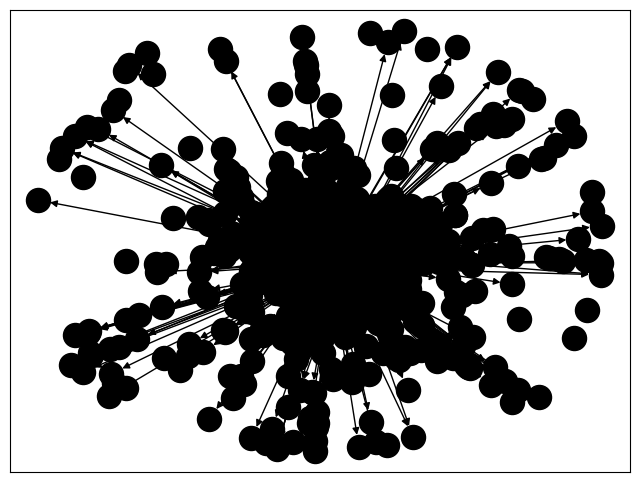

In [10]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, arrows=True, node_color='black')  # Set node_color='black' to make all nodes black
labels = {i: i for i in range(len(adj_mat))}
nx.draw_networkx_labels(g, pos=pos)
# Highlight nodes in intersection with a different color
nx.draw_networkx_nodes(g, pos=pos, nodelist=list(intersection_rand), node_color='red')
plt.show()


In [ ]:
from networkx.algorithms import voterank

k_vr = len(intersection_rand)
vr = voterank(g, number_of_nodes=k_vr)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, arrows=True, node_color='black')  # Set node_color='black' to make all nodes black
labels = {i: i for i in range(len(adj_mat))}
nx.draw_networkx_labels(g, pos=pos)
# Highlight nodes in intersection with a different color
nx.draw_networkx_nodes(g, pos=pos, nodelist=list(vr), node_color='red')
plt.show()


In [11]:
from networkx.algorithms import voterank

pr_transpose = nx.pagerank(g.reverse())
values = np.array(list(pr_transpose.values()))
top_values = np.argsort(-values)[:50]
print(top_values)
vr = voterank(g, number_of_nodes=50)
print(vr)

vr_set = set(vr)
top_values_set = set(top_values)
intersection = vr_set.intersection(top_values_set)
print(intersection)

rand_set = set(intersection_rand)
intersection_reverse_pr = rand_set.intersection(top_values_set)
intersection_vr = vr_set.intersection(rand_set)
print("Rand Set Intersection with reverse Pr",intersection_reverse_pr)
print("Rand Set Intersection with VR",intersection_vr)

[ 50  51  52  20   6  53  10  18   7   0  33  54   9  56   3  22  16   4
   8  12   2  11  24  29  32   1   5  17  55  62  60  57  58  59  13  19
  31  28  14 133  25 130  15  36 131  40  35  23  63  37]
[131, 130, 6, 133, 20, 134, 137, 10, 143, 135, 152, 0, 145, 18, 7, 150, 140, 9, 138, 50, 151, 144, 132, 148, 2, 129, 139, 51, 153, 141, 147, 8, 12, 3, 11, 136, 146, 16, 149, 22, 24, 142, 4, 157, 17, 128, 33, 5, 1, 29]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 133, 130, 16, 17, 18, 20, 131, 22, 24, 29, 33, 50, 51}
Rand Set Intersection with reverse Pr {0, 1, 2, 4, 7, 9, 11, 12, 13, 14, 15, 19, 23, 29, 31, 32, 33, 35, 37, 50, 52, 53, 56, 59, 62, 63}
Rand Set Intersection with VR {0, 1, 2, 33, 4, 7, 9, 11, 12, 50, 29}


In [12]:
def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

In [13]:
pr_test = pagerank(adj_mat, num_iterations=100, d=0.85)
top_values = np.argsort(-pr_test)[:50]
print(top_values)


[50 51 52 10 18  6 53  5 20  9 33 32  3 22 16  7 17 40 54 29 11 28  8  4
 12 24  1 35  0 23 25 14 46 15 56 55 37 19 36  2 31 44 41 13 38 30 47 57
 58 48]


In [29]:
def IC(g,S,ic_threshold,ic_num_steps):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    for i in range(ic_num_steps):
        
        # Simulate propagation process      
        new_active, A = S[:], S[:]
        while new_active:

            # For each newly active node, find its neighbors that become activated
            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                succ = [key for key in g.neighbors(node)]
                success = np.random.uniform(0,1,g.out_degree(node)) < ic_threshold
                new_ones += list(np.extract(success, succ))

            new_active = list(set(new_ones) - set(A))
            
            # Add newly activated nodes to the set of activated nodes
            A += new_active
            
        spread.append(len(A))
        
    return(np.mean(spread))

In [30]:
import time
def greedy(g,k,p=0.1,mc=1000):
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()
    
    # Find k nodes with largest marginal gain
    for _ in range(k):

        # Loop over nodes that are not yet in seed set to find biggest marginal gain
        best_spread = 0
        for j in set(range(g.number_of_nodes()))-set(S):

            # Get the spread
            s = IC(g,S + [j],p,mc)

            # Update the winning node and spread so far
            if s > best_spread:
                best_spread, node = s, j

        # Add the selected node to the seed set
        S.append(node)
        
        # Add estimated spread and elapsed time
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)

In [31]:
greedy_seed = greedy(g, 25, p = 0.5,mc = 2)
seed_set = greedy_seed[0]
spread = greedy_seed[1]
timelapse = greedy_seed[2]

seed_set_set = set(seed_set)
intersection = seed_set_set.intersection(intersection_rand)
print("Greedy Set Intersection with Rand",intersection)
intersection = seed_set_set.intersection(intersection_pr)
print("Greedy Set Intersection with Pr",intersection)
intersection = seed_set_set.intersection(intersection_reverse_pr)
print("Greedy Set Intersection with Reverse Pr",intersection)
intersection = seed_set_set.intersection(intersection_vr)
print("Greedy Set Intersection with VR",intersection)